# Intelligent Control (ECE-DK807)

## Electrical and Computer Engineering Department, University of Patras Greece

**Instructor:** Konstantinos Chazilygeroudis (costashatz@upatras.gr)

## Lab 3

### Gradient Descent

**Adam Optimizer**

1. Initialize $\boldsymbol{m}_0 = \boldsymbol{v}_0 = \boldsymbol{0}, \beta_1,\beta_2\in[0,1), \epsilon>0$
2. $\boldsymbol{g}_{k+1} = \nabla_{\boldsymbol{x}}f(\boldsymbol{x}_k)$
3. $\boldsymbol{m}_{k+1} = \beta_1\boldsymbol{m}_k + (1 - \beta_1)\boldsymbol{g}_{k+1}$
4. $\boldsymbol{v}_{k+1} = \beta_2\boldsymbol{v}_k + (1 - \beta_2)\boldsymbol{g}^2_{k+1}$
5. $\boldsymbol{x}_{k+1} = \boldsymbol{x}_k - \alpha\frac{\frac{\boldsymbol{m}_{k+1}}{1 - \beta_1^{k+1}}}{\sqrt{\frac{\boldsymbol{v}_{k+1}}{1 - \beta_2^{k+1}}}+\epsilon}$
6. $k=k+1$ and back to step 2 until we converge

Let's implement it!

In [6]:
# Let's first import modules
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Plotting
import copy

In [7]:
# First we initialize values
adamM = 0.
adamV = 0.
adamB1n = 0.9
adamB2n = 0.999

def reset_adam():
    global adamM, adamV, adamB1n, adamB2n
    adamM = 0.
    adamV = 0.
    adamB1n = 0.9
    adamB2n = 0.999

# Adam step
# x is the current iterate, x_k
# df is the derivative/gradient of the function we want to optimize
# a is the learning rate
# b1 is the β_1 parameter
# b2 is the β_2 parameter
# eps is the ε parameter
def adam_step(x, df, a = 0.001, b1 = 0.9, b2 = 0.999, eps = 1e-8):
    global adamM, adamV, adamB1n, adamB2n
    ### TO-DO: Implement the steps (1-5) of the Adam algorithm. You need to return x_{k+1}
    ### adamM, adamV global variables are used to store the current m_k and v_k values (updated at each iteration)
    ### adamB1n, adamB2n global variables are used to store β_1^{k+1} and β_2^{k+1} (to avoid having to know the number of iterations)
    ### ANSWER: Insert code here
    gk1=df(x)
    adamM=adamB1n*adamM+(1-adamB1n)*gk1
    adamV=adamB2n*adamV+(1-adamB2n)*gk1*gk1  
    adamB1n *= b1   #beta1(t) = beta1^t
    adamB2n *= b2
    x=x-a*((adamM /(1-adamB1n))/(np.sqrt(adamV/(1-adamB2n))+eps))

    return x
    ### END of ANSWER

In [8]:
# First reset Adam
reset_adam()

def simple_f(x):
    return np.square(x)

def simple_df(x):
    return 2. * x

x = 10.
lr = 1e-3
x = adam_step(x, simple_df, lr)
assert(np.isclose(x, 9.999, rtol=1e-4))
x = adam_step(x, simple_df, lr)
assert(np.isclose(x, 9.998, rtol=1e-4))
x = adam_step(x, simple_df, lr)
assert(np.isclose(x, 9.997, rtol=1e-4))
x = adam_step(x, simple_df, lr)
assert(np.isclose(x, 9.996, rtol=1e-4))


reset_adam()

In [9]:
# Let's optimize the Rastrigin function
def f(x):
    ### TO-DO: Implement the Rastrigin function for any dimension as defined in https://www.sfu.ca/~ssurjano/rastr.html
    ### we assume that the input is of the form (dimensions, batch_size)
    ### f(x) should return a (batch_size,) numpy array
    ### ANSWER: Insert code here
    x = np.asarray(x)  # Ensure input is a NumPy array
    d, batch_size = x.shape  # Get dimensions and batch size
    summation = np.sum(x**2 - 10 * np.cos(2 * np.pi * x), axis=0)  # Sum across dimensions
    y = 10 * d + summation  # Compute function value
    return y  # Return function values and batch size
    ### END of ANSWER

def df(x):
    ### TO-DO: Write the derivative of the Rastrigin function
    ### we assume that the input is of the form (dimensions, batch_size)
    ### df should return a (dimensions, batch_size) numpy array
    ### ANSWER: Insert code here
    x = np.asarray(x)  # Ensure input is a NumPy array
    grad = sum(2 * x + 20 * np.pi * np.sin(2 * np.pi * x) ) # Compute derivative
    return grad
    ### END of ANSWER

In [10]:
x = np.array([[5., 4., 3., 2., 1., 0., -1., -2., -3., -4., -5.]])
assert(np.isclose(f(x), np.array([25., 16., 9., 4., 1., 0., 1., 4., 9., 16., 25.])).all())


In [11]:
x = np.array([[5., 4., 3., 2., 1., 0., -1., -2., -3., -4., -5.]])
assert(np.isclose(df(x), np.array([[10., 8., 6., 4., 2., 0., -2., -4., -6., -8., -10.]])).all())


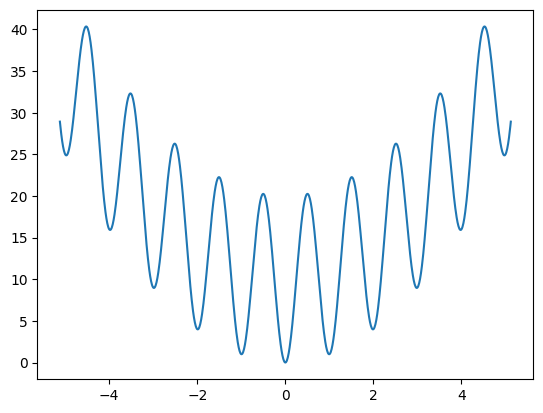

In [12]:
# Let's plot the function
x = np.linspace(-5.12, 5.12, 1000)

plt.close() # close previous
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, f(x.reshape((1, -1))));

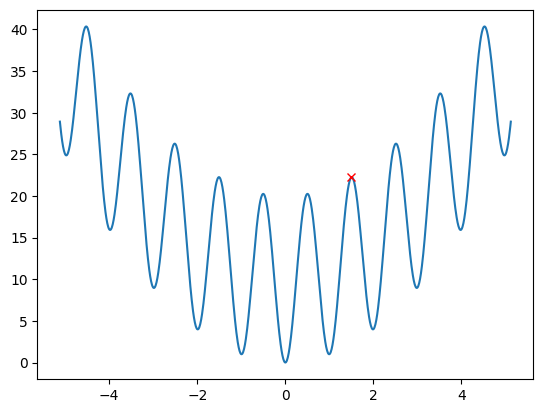

In [13]:
# Let's optimize
# Initial point!
x_init = np.array([[1.5]])

ax.plot(x_init, f(x_init), 'rx')

# Optimization!
x_new = np.copy(x_init)

fig # show figure again with updated point(s)

[[1.24490827]]


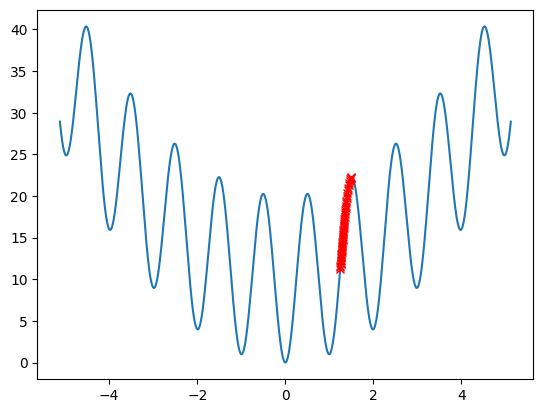

In [14]:
# Let's do a few steps of Adam
lr = 0.01 # learning rate
for i in range(50):
    x_new = adam_step(x_new, df, lr)
    ax.plot(x_new, f(x_new), 'rx')

print(x_new)

fig # show figure again with updated point(s)

### Neural Networks

Now let's learn a nice neural network to approximate our Rastrigin function!

First let's create a dataset. For this we sample $K$ points randomly in the input space of our function. The Rastrigin function is defined in $[-5.12, 5.12]$. So, let's do this:

In [15]:
# Number of points
K = 2000

np.random.seed(2)

### TO-DO: Sample random inputs in [-5.12, 5.12]. We need to sample a dim x K matrix. Store the result in a variable named 'Xn'
### ANSWER: Insert code here
Xn=np.random.uniform(-5.12, 5.12, (1, K))
### END of ANSWER

### TO-DO: Evaluate the function in the sampled points. Store the result in a output_dim x K matrix, and a variable named 'Yn'
### ANSWER: Insert code here
Yn=f(Xn).reshape(1,K)
### END of ANSWER

In [16]:
assert(Xn.shape == (1, 2000))
assert(Yn.shape == (1, 2000))

assert(np.isclose(Xn[0, 0], -0.655, rtol=1e-3))
assert(np.isclose(Yn[0, 0], 16.029, rtol=1e-3))


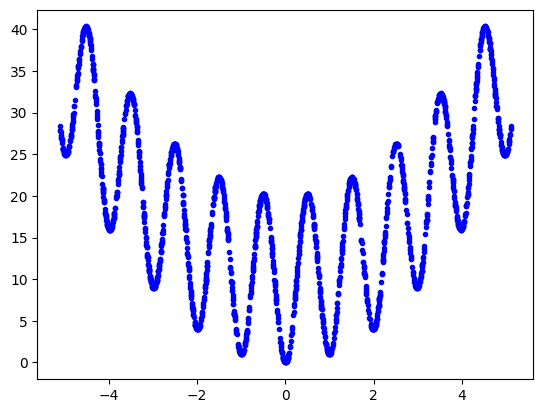

In [17]:
# Let's plot our dataset!
plt.close() # close previous
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(Xn, Yn, 'b.');

In [28]:
# Now let's import pytorch
import torch # For neural networks and automatic differentiation
torch.set_num_threads(1)

# Convert numpy arrays to tensors
# We transpose the arrays because torch assumes (batch_size, dimension)
X = torch.Tensor(Xn.T)
Y = torch.Tensor(Yn.T)

Now we need to make our neural network! Let's create a feedforward neural network with 2 hidden layers (32 and 64 units respectively), let's use `tanh` as the activation functions for the hidden layers, and no activation for the output layer!

In [29]:
# MLP Model
model = torch.nn.Sequential(
    ### TO-DO: Fill up the model with layers and activation functions as described above!
    ### ANSWER: Insert code here
    torch.nn.Linear(1, 32),  # Input: 1 -> Hidden layer 1 (32 units)
    torch.nn.Tanh(),
    torch.nn.Linear(32, 64),  # Hidden layer 1 -> Hidden layer 2 (64 units)
    torch.nn.Tanh(),
    torch.nn.Linear(64, 1)
    ### END of ANSWER
)

In [30]:
params = list(model.named_parameters())
assert(params[0][1].size() == torch.Size([32, 1]))
assert(params[4][1].size() == torch.Size([1, 64]))


Now we need to make a learning loop:

1. Compute model prediction $y_{pred}$ for the input $X$
2. Compute loss given the actual labels $Y$
3. Zero the gradients of the optimizer
4. Automatically compute gradients (`backward` pass)
5. Perform one step of the optimizer

Let's implement those with the Adam optimizer!

In [31]:
# Let's first create a function that computes the predictions of the model
def prediction(model, x):
    ### TO-DO: Return the prediction of the model when given as input X
    ### ANSWER: Insert code here
    return model.forward(x)
    ### END of ANSWER

In [32]:
# Now let's create a function that computes the mean squared error loss
def loss(y_pred, y_true):
    ### TO-DO: Compute and return the mean squared error. Remember that torch assumes (batch_size, dimension) for batched operations.
    ### ANSWER: Insert code here
    mse = torch.mean((y_pred - y_true) ** 2)
    return mse.unsqueeze(0)  # Ensures output shape is (1,)
    ### END of ANSWER

In [33]:
Y_perturbed = Y + 2.
assert(torch.isclose(loss(Y_perturbed, Y), torch.ones(Y.shape[1]) * 4.).all())
Y_perturbed = Y - 2.
assert(np.isclose(loss(Y_perturbed, Y), torch.ones(Y.shape[1]) * 4.).all())

assert(loss(Y_perturbed, Y).size() == torch.Size((1,)))

In [34]:
# Now let's create a function that performs steps 3, 4 and 5 of the above procedure. Assume that the loss value is given as input, and the optimizer is given as input
def update_optimizer(optimizer, loss_value):
    ### ANSWER: Insert code here
    optimizer.zero_grad()  # Step 3: Zero gradients
    loss_value.backward()  # Step 4: Compute gradients
    optimizer.step() 
    ### END of ANSWER

In [35]:
tmp_model = copy.deepcopy(model)

# Initialize weights of the model
def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        m.weight.data.fill_(1.)
        m.bias.data.fill_(0.01)

tmp_model.apply(init_weights)

lr = 1e-3
optim = torch.optim.Adam(tmp_model.parameters(), lr=lr) # Adam optimizer

myloss = loss(prediction(tmp_model, X), Y)
assert(update_optimizer(optim, myloss) == None)
myloss = loss(prediction(tmp_model, X), Y)
assert(update_optimizer(optim, myloss) == None)

params = list(tmp_model.parameters())
assert(torch.isclose(params[0].grad, torch.ones_like(params[0].grad) * 0.9356, rtol=1e-4).all())
assert(torch.isclose(params[1].grad, torch.ones_like(params[1].grad) * 0.5833, rtol=1e-4).all())
assert(torch.isclose(params[2].grad, torch.ones_like(params[2].grad) * 0.0147, rtol=1e-4, atol=1e-4).all())
assert(torch.isclose(params[3].grad, torch.ones_like(params[3].grad) * 0.009, rtol=1e-4, atol=1e-4).all())
assert(torch.isclose(params[4].grad, torch.ones_like(params[4].grad) * 128.829, rtol=1e-4).all())
assert(torch.isclose(params[5].grad, torch.ones_like(params[5].grad) * (-44.53), rtol=1e-4).all())

In [36]:
# Let's create the optimizer
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # Adam optimizer

for t in range(20000):
    y_pred = prediction(model, X)

    myloss = loss(y_pred, Y)
    if t == 0 or (t + 1) % 200 == 0:
        print(t+1, myloss.item() / K)

    update_optimizer(optimizer, myloss)

1 0.2278677215576172
200 0.05855448532104492
400 0.05084688949584961
600 0.041074840545654294
800 0.02954171371459961
1000 0.02569465446472168
1200 0.025037288665771484
1400 0.024760759353637696
1600 0.02459663391113281
1800 0.02445934295654297
2000 0.02431163215637207
2200 0.024107810974121093
2400 0.023832431793212892
2600 0.023485347747802733
2800 0.02307139015197754
3000 0.022610912322998045
3200 0.022194358825683595
3400 0.021827407836914062
3600 0.021427167892456054
3800 0.021034854888916016
4000 0.020337038040161133
4200 0.019438528060913087
4400 0.018526613235473634
4600 0.017539073944091797
4800 0.01656350326538086
5000 0.015579872131347657
5200 0.014578486442565918
5400 0.013627210617065429
5600 0.012868393898010254
5800 0.012268051147460938
6000 0.011795045852661133
6200 0.011444108963012695
6400 0.011168591499328613
6600 0.010946887969970703
6800 0.0107384672164917
7000 0.01049995231628418
7200 0.010183594703674316
7400 0.009751216888427734
7600 0.00922903537750244
7800 0.0

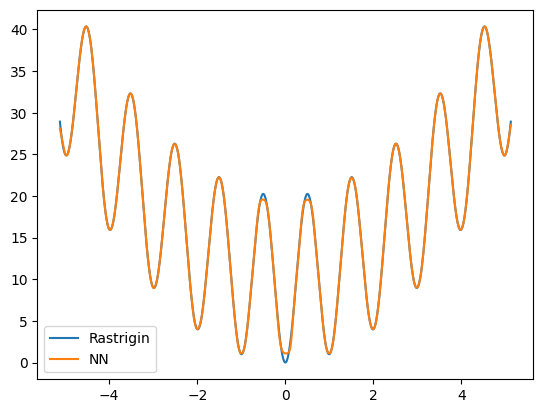

In [39]:
# Let's plot the function
x = np.linspace(-5.12, 5.12, 1000)

plt.close() # close previous
fig = plt.figure()
ax = fig.add_subplot(111)

# ax.plot(X, Y, '.')
ax.plot(x, f(x.reshape((1, -1))), label='Rastrigin')

ax.plot(x, [prediction(model, torch.Tensor(x[i].reshape((1, -1)))).detach().numpy()[0, 0] for i in range(len(x))], label='NN')

ax.legend();

In [46]:
# We can also create our model using the nn.Module class of pytorch
# The model should be identical to the previous one!
import torch.nn as nn
import torch.nn.functional as F
class MyModel(torch.nn.Module):
    # Constructor
    def __init__(self):
        super().__init__()
        # Define the layers
        self.fc1 = torch.nn.Linear(1, 32)  # Input -> 32 units
        self.fc2 = torch.nn.Linear(32, 64)  # 32 -> 64 units
        self.fc3 = torch.nn.Linear(64, 1)  # 64 -> Output (1 unit)

    # Define forward pass
    def forward(self, x):
        x = F.tanh(self.fc1(x))  # First hidden layer with tanh activation
        x = F.tanh(self.fc2(x))  # Second hidden layer with tanh activation
        x = self.fc3(x)  # Output layer (no activation)
        return x


In [47]:
tmp_model = MyModel()

# Initialize weights of the model
def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        m.weight.data.fill_(1.)
        m.bias.data.fill_(0.01)

tmp_model.apply(init_weights)

lr = 1e-3
optim = torch.optim.Adam(tmp_model.parameters(), lr=lr) # Adam optimizer

myloss = loss(prediction(tmp_model, X), Y)
assert(update_optimizer(optim, myloss) == None)
myloss = loss(prediction(tmp_model, X), Y)
assert(update_optimizer(optim, myloss) == None)

params = list(tmp_model.parameters())
assert(torch.isclose(params[0].grad, torch.ones_like(params[0].grad) * 0.9356, rtol=1e-4).all())
assert(torch.isclose(params[1].grad, torch.ones_like(params[1].grad) * 0.5833, rtol=1e-4).all())
assert(torch.isclose(params[2].grad, torch.ones_like(params[2].grad) * 0.0147, rtol=1e-4, atol=1e-4).all())
assert(torch.isclose(params[3].grad, torch.ones_like(params[3].grad) * 0.009, rtol=1e-4, atol=1e-4).all())
assert(torch.isclose(params[4].grad, torch.ones_like(params[4].grad) * 128.829, rtol=1e-4).all())
assert(torch.isclose(params[5].grad, torch.ones_like(params[5].grad) * (-44.53), rtol=1e-4).all())

In [48]:
# Create the new model
model = MyModel()

# Let's create the optimizer
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # Adam optimizer

for t in range(20000):
    y_pred = prediction(model, X)

    myloss = loss(y_pred, Y)
    if t == 0 or (t + 1) % 200 == 0:
        print(t+1, myloss.item() / K)

    update_optimizer(optimizer, myloss)

1 0.2245364990234375
200 0.05748739242553711
400 0.051334239959716796
600 0.04247104263305664
800 0.02843515205383301
1000 0.025389957427978515
1200 0.0248290901184082
1400 0.024661766052246094
1600 0.024596710205078125
1800 0.02456121253967285
2000 0.02452947425842285
2200 0.024485906600952147
2400 0.024419023513793946
2600 0.024315902709960938
2800 0.024158815383911132
3000 0.023907337188720703
3200 0.023525598526000977
3400 0.023016304016113282
3600 0.022370792388916014
3800 0.02168337821960449
4000 0.021002086639404297
4200 0.020337018966674805
4400 0.019704002380371094
4600 0.019125705718994142
4800 0.018620161056518553
5000 0.017854953765869142
5200 0.016833927154541014
5400 0.015746838569641115
5600 0.01474339485168457
5800 0.013841727256774902
6000 0.01314597225189209
6200 0.012552468299865723
6400 0.011910242080688476
6600 0.010893767356872558
6800 0.00996036148071289
7000 0.009244586944580078
7200 0.008674055099487306
7400 0.008232437133789062
7600 0.007858330726623536
7800 0

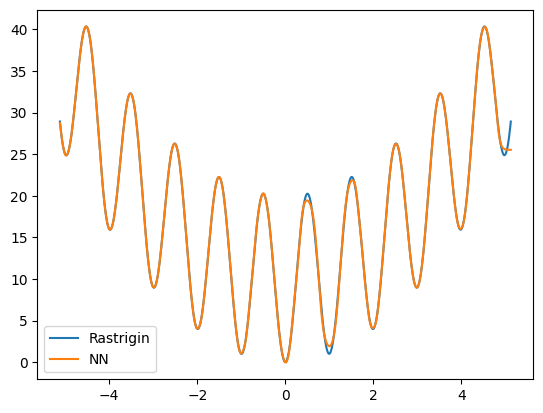

In [49]:
# Let's plot the function
x = np.linspace(-5.12, 5.12, 1000)

plt.close() # close previous
fig = plt.figure()
ax = fig.add_subplot(111)

# ax.plot(X, Y, '.')
ax.plot(x, f(x.reshape((1, -1))), label='Rastrigin')

ax.plot(x, [prediction(model, torch.Tensor(x[i].reshape((1, -1)))).detach().numpy()[0, 0] for i in range(len(x))], label='NN')

ax.legend();

In [50]:
# We can also use pytorch's built-in functions for learning with batches
from torch.utils.data import Dataset, DataLoader

# We create a custom dataset class
class NumpyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.Tensor(X) # Convert NumPy to Tensor
        self.y = torch.Tensor(y) # Convert NumPy to Tensor

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [51]:
# Let's create the actual dataset and dataloader (aka the worker that makes the batches)
dataset = NumpyDataset(Xn.T, Yn.T)

# We want a batch size of 32, and we randomly shuffle the samples
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [52]:
# Create the new model
model = MyModel()

# Let's create the optimizer
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # Adam optimizer

# Training Loop
num_epochs = 200
for epoch in range(num_epochs):
    epoch_loss = 0.0

    for batch_X, batch_y in dataloader:
        outputs = prediction(model, batch_X)

        myloss = loss(outputs, batch_y)

        update_optimizer(optimizer, myloss)

        epoch_loss += myloss.item()

    # if epoch == 0 or (epoch + 1) % 20 == 0:
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(dataloader):.4f}")


Epoch 1/200, Loss: 238.2314
Epoch 2/200, Loss: 104.3442
Epoch 3/200, Loss: 94.1210
Epoch 4/200, Loss: 69.5334
Epoch 5/200, Loss: 55.8675
Epoch 6/200, Loss: 52.1622
Epoch 7/200, Loss: 50.7891
Epoch 8/200, Loss: 50.3955
Epoch 9/200, Loss: 50.1818
Epoch 10/200, Loss: 50.1669
Epoch 11/200, Loss: 49.9499
Epoch 12/200, Loss: 50.0244
Epoch 13/200, Loss: 49.8413
Epoch 14/200, Loss: 49.8807
Epoch 15/200, Loss: 49.9482
Epoch 16/200, Loss: 49.8807
Epoch 17/200, Loss: 49.7700
Epoch 18/200, Loss: 49.8300
Epoch 19/200, Loss: 49.8992
Epoch 20/200, Loss: 50.0282
Epoch 21/200, Loss: 49.9185
Epoch 22/200, Loss: 49.9511
Epoch 23/200, Loss: 49.8512
Epoch 24/200, Loss: 49.6209
Epoch 25/200, Loss: 49.8357
Epoch 26/200, Loss: 49.8568
Epoch 27/200, Loss: 49.6167
Epoch 28/200, Loss: 49.7925
Epoch 29/200, Loss: 49.7613
Epoch 30/200, Loss: 49.6462
Epoch 31/200, Loss: 49.7906
Epoch 32/200, Loss: 49.7005
Epoch 33/200, Loss: 49.6866
Epoch 34/200, Loss: 49.8478
Epoch 35/200, Loss: 49.7745
Epoch 36/200, Loss: 49.7292

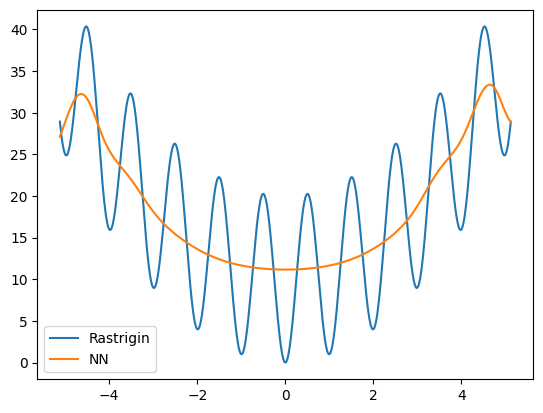

In [53]:
# Let's plot the function
x = np.linspace(-5.12, 5.12, 1000)

plt.close() # close previous
fig = plt.figure()
ax = fig.add_subplot(111)

# ax.plot(X, Y, '.')
ax.plot(x, f(x.reshape((1, -1))), label='Rastrigin')

ax.plot(x, [prediction(model, torch.Tensor(x[i].reshape((1, -1)))).detach().numpy()[0, 0] for i in range(len(x))], label='NN')

ax.legend();